In [1]:
import pickle
import topmed_manuscript_clean as tm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from qtl.locusplot import compute_ld
import numpy as np
import pygenometracks.tracks as pygtk
from adjustText import adjust_text
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def get_lbf_df(susie_gene_result):
    df = pd.DataFrame(susie_gene_result['lbf_variable'])
    df.index = susie_gene_result['sets']['purity'].index
    df.columns = susie_gene_result['pip'].index
    return df

PREFIX = 'Fig3D.'
GENE_BED = '/net/topmed10/working/porchard/rnaseq/data/gtf/collapsed.names.bed'
GTF = '../../manuscript-intermediate-processing/data/gtf/gencode.v30.GRCh38.ERCC.genes.collapsed_only.gtf.gz'
METADATA = '../../manuscript-intermediate-processing/data/metadata/metadata.tm.txt'


gtf_df = tm.gtf_to_df(GTF, parse_attributes=['gene_id', 'gene_name'])
gtf_df = gtf_df[gtf_df.feature=='gene']
gene_id_to_gene_name = dict(zip(gtf_df.gene_id, gtf_df.gene_name))
gene_id_to_gene_chrom = dict(zip(gtf_df.gene_id, gtf_df.chrom))
gene_id_to_tss_pos = {gene_id: start if strand == '+' else end for gene_id, start, end, strand in zip(gtf_df.gene_id, gtf_df.start, gtf_df.end, gtf_df.strand)}
metadata = pd.read_csv(METADATA, sep='\t')

In [2]:
track_config = dict(file=GENE_BED, arrow_length=1000, arrow_interval=10, file_type='bed', height=3, color='black', merge_transcripts=False, labels=True, section_name='', prefered_name='gene_name', global_max_row=False, fontstyle='italic', font_size=8
, style="UCSC", all_labels_inside=False, labels_in_margin=True)
tk = pygtk.BedTrack(track_config)

  0%|                                                                                                                                                                                                                                                                                         | 0/58103 [00:00<?, ?it/s]

  4%|██████████▍                                                                                                                                                                                                                                                                | 2263/58103 [00:00<00:03, 15467.83it/s]

 11%|█████████████████████████████▌                                                                                                                                                                                                                                             | 6430/58103 [00:00<00:01, 28409.66it/s]

 18%|████████████████████████████████████████████████▌                                                                                                                                                                                                                         | 10611/58103 [00:00<00:01, 33953.18it/s]

 26%|███████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                      | 14851/58103 [00:00<00:01, 37090.40it/s]

 32%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                    | 18696/58103 [00:00<00:01, 28871.05it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                | 22976/58103 [00:00<00:01, 32709.73it/s]

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                            | 27374/58103 [00:00<00:00, 35893.36it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 31213/58103 [00:01<00:00, 27487.20it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                       | 35440/58103 [00:01<00:00, 30971.56it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 39824/58103 [00:01<00:00, 34211.67it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 44130/58103 [00:01<00:00, 36552.42it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 48071/58103 [00:01<00:00, 26480.84it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 52417/58103 [00:01<00:00, 30172.58it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 56893/58103 [00:01<00:00, 33630.37it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58103/58103 [00:01<00:00, 31839.68it/s]

In [3]:
# AGAP2 w/ cis gene RREB1
TISSUE = 'Whole_blood'
CIS_MAF = '1%'
CIS_PHENOTYPE = 'chr6:7231907:7246424:clu_37177_+:ENSG00000124782.20'
TRANS_PHENOTYPE = 'ENSG00000135439.11'
CIS_GENE = CIS_PHENOTYPE.split(':')[-1]
TRANS_GENE = TRANS_PHENOTYPE.split(':')[-1]
CIS_MODALITY = 'cis-eQTL' if CIS_PHENOTYPE == CIS_GENE else 'cis-sQTL'
TRANS_MODALITY = 'trans-eQTL' if TRANS_PHENOTYPE == TRANS_GENE else 'trans-sQTL'

CIS_GENE_NAME = gene_id_to_gene_name[CIS_GENE]
TRANS_GENE_NAME = gene_id_to_gene_name[TRANS_GENE]
samples = metadata[(metadata.used_for_scan) & (metadata.tissue==TISSUE)]

CIS_GENE_CHROM = gene_id_to_gene_chrom[CIS_GENE]
TRANS_GENE_CHROM = gene_id_to_gene_chrom[TRANS_GENE]
CIS_GENE_TSS_POS = gene_id_to_tss_pos[CIS_GENE]
REGION_START, REGION_END = int(CIS_GENE_TSS_POS - 1e6), int(CIS_GENE_TSS_POS + 1e6)
VCF = f'/net/topmed10/working/porchard/rnaseq/work/scan-variant-vcf-files/freeze-2b/results/vcfs-by-chrom/{TISSUE}.{CIS_GENE_CHROM}.vcf.gz'

susie_cis = '../../manuscript-intermediate-processing/data/scan-results/joint/cis-sqtl/susie/maf001/postprocessed/Whole_blood.by-gene.pickle'
susie_trans = '../../manuscript-intermediate-processing/data/scan-results/joint/trans-eqtl/maf005/trans-susie/Whole_blood.susie.pickle'

In [4]:
samples.head()

,cohort,sequencing_center,tor,tissue,inferred_sex,wgs,used_for_scan
4434,SPIROMICS,uw,TOR798065,Whole_blood,female,NWD877622,True
4438,SPIROMICS,uw,TOR176083,Whole_blood,male,NWD626737,True
4439,SPIROMICS,uw,TOR258806,Whole_blood,female,NWD136105,True
4442,SPIROMICS,uw,TOR595555,Whole_blood,female,NWD499935,True
4444,SPIROMICS,uw,TOR738006,Whole_blood,male,NWD634590,True


In [5]:
alt_allele_counts = tm.get_alt_allele_counts(VCF, region=f'{CIS_GENE_CHROM}:{REGION_START}-{REGION_END}', samples=samples.wgs.to_list())
alt_allele_counts.head()

,NWD731862,NWD108665,NWD859388,NWD549799,NWD982437,NWD204249,NWD716951,NWD839794,NWD679110,NWD278690,...,NWD644803,NWD699533,NWD799019,NWD727550,NWD676833,NWD555394,NWD195923,NWD343097,NWD790792,NWD823688
chr6_6107645_G_T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr6_6107856_A_C,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
chr6_6107992_A_T,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
chr6_6108259_A_G,1,1,2,1,1,1,0,0,2,2,...,2,2,1,1,1,1,0,1,1,0
chr6_6108265_A_G,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# filter to MAF
min_maf = 0.01 if CIS_MAF == '1%' else 0.001
af = alt_allele_counts.sum(axis=1) / (len(alt_allele_counts.columns)*2)
maf = np.minimum(af, 1-af)
alt_allele_counts = alt_allele_counts[maf >= min_maf]

In [7]:
with open(susie_cis, 'rb') as f:
    susie_cis = pickle.load(f)
with open(susie_trans, 'rb') as f:
    susie_trans = pickle.load(f)
cis_lbf = get_lbf_df(susie_cis[CIS_PHENOTYPE])
trans_lbf = get_lbf_df(susie_trans[TRANS_PHENOTYPE])

In [8]:
trans_lbf.idxmax(axis=1)

L2          chr6_7231610_G_A
L1          chr6_7240344_A_T
L3    chr6_7145960_T_TGATGAA
dtype: string

In [9]:
cis_lbf.idxmax(axis=1)

L1    chr6_7240344_A_T
dtype: string

In [10]:
trans_df = trans_lbf.melt(ignore_index=False).reset_index().rename(columns={'index': 'effect', 'value': 'lbf'})
trans_df['pos'] = trans_df.variant_id.str.split('_', expand=True)[1].astype(int)
trans_df['stat'] = trans_df.lbf
trans_df.head()

,effect,variant_id,lbf,pos,stat
0,L2,chr6_6240456_G_T,-1.856137,6240456,-1.856137
1,L1,chr6_6240456_G_T,-2.131536,6240456,-2.131536
2,L3,chr6_6240456_G_T,-1.686867,6240456,-1.686867
3,L2,chr6_6240775_G_A,-1.625140,6240775,-1.625140
4,L1,chr6_6240775_G_A,-1.957334,6240775,-1.957334


In [11]:
cis_df = cis_lbf.melt(ignore_index=False).reset_index().rename(columns={'index': 'effect', 'value': 'lbf'})
cis_df['pos'] = cis_df.variant_id.str.split('_', expand=True)[1].astype(int)
cis_df['stat'] = cis_df.lbf
cis_df.head()

,effect,variant_id,lbf,pos,stat
0,L1,chr6_6107856_A_C,-1.360320,6107856,-1.360320
1,L1,chr6_6107992_A_T,-0.693899,6107992,-0.693899
2,L1,chr6_6108259_A_G,-1.004431,6108259,-1.004431
3,L1,chr6_6108616_C_A,-1.353083,6108616,-1.353083
4,L1,chr6_6108902_A_G,-1.166385,6108902,-1.166385


/tmp/ipykernel_3618373/406102838.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ld'] = df.variant_id.map(compute_ld(alt_allele_counts, lead_variant).to_dict())
/tmp/ipykernel_3618373/406102838.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(palette)


/tmp/ipykernel_3618373/406102838.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ld'] = df.variant_id.map(compute_ld(alt_allele_counts, lead_variant).to_dict())
/tmp/ipykernel_3618373/406102838.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(palette)


/tmp/ipykernel_3618373/406102838.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(palette)


DEBUG:pygenometracks.tracks.GenomeTrack:ylim 1.08,-0.08


DEBUG:pygenometracks.tracks.GenomeTrack:ylim (1.08, -0.08)


/tmp/ipykernel_3618373/406102838.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


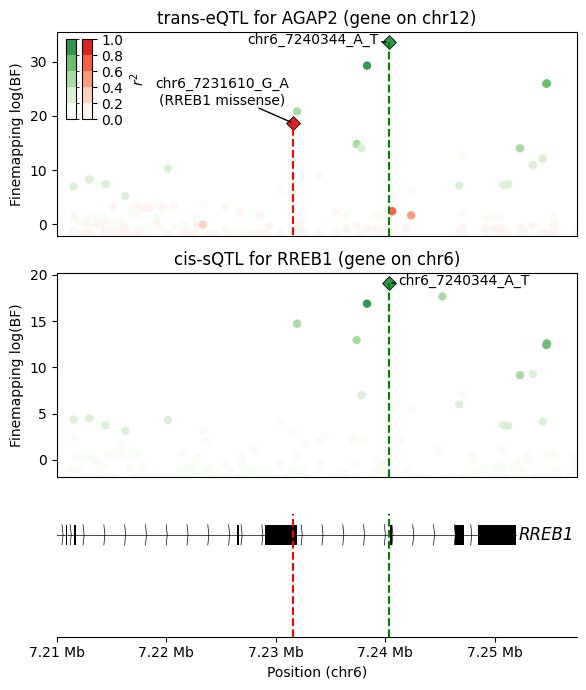

In [12]:
def locuszoom(df, ax, lead_variant, palette='Blues'):
    # dataframe needs a 'pos', 'variant_id', 'stat', 'ld' column

    cmap = cm.get_cmap(palette)
    bounds = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    new_cmap = tm.truncate_colormap(cmap, 0, 0.7, n=cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds, new_cmap.N)

    lead_variant_marker =  {'marker': 'D', 'color': new_cmap(norm(1.0)), 'edgecolor': 'black', 's': 50}
    kwargs = {'hue': 'ld', 'palette': new_cmap, 'hue_norm': norm, 'legend': True, 'edgecolor': 'None', 'legend': False}

    sns.scatterplot(x='pos', y='stat', data=df, ax=ax, **kwargs)
    sns.scatterplot(x='pos', y='stat', data=df[df.variant_id==lead_variant], ax=ax, legend=False, **lead_variant_marker)
    ax.set_xlabel('Position')
    ax.xaxis.set_major_formatter(tm.pos_formatter)

    return (ax, norm, new_cmap)


fig, axs = plt.subplots(nrows=3, figsize=(6, 7), gridspec_kw={'height_ratios': [1, 1, 0.6]})
XMIN = 7.21e6
XMAX = 7.2575e6

ax = axs[0]
texts = []
for i, (effect, palette) in enumerate(zip(['L1', 'L2'], ['Greens', 'Reds'])):
    df = trans_df[trans_df.effect==effect]
    lead_variant = df.sort_values('stat', ascending=False).variant_id.values[0]
    lead_variant_pos = int(lead_variant.split('_')[1])
    lead_variant_stat = df[df.variant_id==lead_variant].stat.values[0]
    df['ld'] = df.variant_id.map(compute_ld(alt_allele_counts, lead_variant).to_dict())
    (ax, norm, cmap) = locuszoom(df, ax, lead_variant, palette=palette)
    ax.set_xlim(XMIN, XMAX)
    ax.plot([lead_variant_pos, lead_variant_pos], [df.stat.min(), lead_variant_stat], color=palette.rstrip('s').lower(), ls='--')
    cax = inset_axes(ax, width=0.1, height=0.8, bbox_to_anchor=(0.05+0.03*i,1), bbox_transform=ax.transAxes)
    if i == 1:
        fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='vertical', label='$r^2$')
    else:
        cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='vertical', label='')
        cbar.set_ticks([])
    texts.append(ax.text(lead_variant_pos, lead_variant_stat, lead_variant if effect == 'L1' else f'{lead_variant}\n(RREB1 missense)', ha='right'))
ax.set_ylim(bottom=trans_df.stat.min())
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='black'), x=trans_df.pos.to_list(), y=trans_df.stat.to_list())
ax.set_title(f'{TRANS_MODALITY} for {TRANS_GENE_NAME} (gene on {TRANS_GENE_CHROM})')
ax.set_ylabel('Finemapping log(BF)')
ax.set_xticks([])
ax.set_xlabel('')


ax = axs[1]
texts = []
for effect, palette in zip(['L1'], ['Greens']):
    df = cis_df[cis_df.effect==effect]
    lead_variant = df.sort_values('stat', ascending=False).variant_id.values[0]
    lead_variant_pos = int(lead_variant.split('_')[1])
    lead_variant_stat = df[df.variant_id==lead_variant].stat.values[0]
    df['ld'] = df.variant_id.map(compute_ld(alt_allele_counts, lead_variant).to_dict())
    locuszoom(df, ax, lead_variant, palette=palette)
    ax.set_xlim(XMIN, XMAX)
    texts.append(ax.text(lead_variant_pos, lead_variant_stat, lead_variant))
    #ax.axvline(lead_variant_pos, color=palette.rstrip('s').lower(), ls='--')
    ax.plot([lead_variant_pos, lead_variant_pos], [df.stat.min(), lead_variant_stat], color=palette.rstrip('s').lower(), ls='--')
ax.set_ylim(bottom=cis_df.stat.min())
ax.set_title(f'{CIS_MODALITY} for {CIS_GENE_NAME} (gene on {CIS_GENE_CHROM})')
ax.set_ylabel('Finemapping log(BF)')
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='black'), x=cis_df.pos.to_list(), y=cis_df.stat.to_list())
ax.set_xticks([])
ax.set_xlabel('')


# gene model
ax = axs[2]
XLIMS = [XMIN, XMAX]
ax.set_xlim(XLIMS)
for effect, palette in zip(['L1', 'L2'], ['Greens', 'Reds']):
    df = trans_df[trans_df.effect==effect]
    lead_variant = df.sort_values('stat', ascending=False).variant_id.values[0]
    lead_variant_pos = int(lead_variant.split('_')[1])
    lead_variant_stat = df[df.variant_id==lead_variant].stat.values[0]
    ax.axvline(lead_variant_pos, color=palette.rstrip('s').lower(), ls='--')
tk.plot(ax, CIS_GENE_CHROM, XMIN, XMAX)
ax.xaxis.set_major_formatter(tm.pos_formatter)
ax.set_xlabel(f'Position ({CIS_GENE_CHROM})')
ax.set_yticks([])
ax.set_ylim(-2, 1)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


fig.tight_layout()
fig.savefig(f'figures/{PREFIX}{CIS_GENE}___{TRANS_GENE}.png', dpi=300, facecolor='white')